# **Is the proportion of theft occurring in the neighbourhood of West Point Grey higher than Dunbar-Southlands?**

By Group 34: Andy Hu, Wendi Ke, CC Liang, Mridul Manas

# Introduction
The term ‘crime’ brings chills down everyone’s spines, as it involves unlawful activities, with theft as the most common type of crime in Canada ([Government of Canada](https://www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html)). Section 322 of the Canadian Criminal Code defines "theft" as "fraudulently and without colour of right" take someone's property or converts its ownership ([Criminal Code](https://laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html)). Understanding crime statistics is crucial to enhancing community relations, measuring enforcement and prevention initiatives, and minimizing the risk of encounter by making better decisions ([Vancouver Police Department](https://vpd.ca/crime-statistics/)). In this paper, we will delve deeper into the nature of this property crime occurring near the UBC Vancouver campus by examining the two geographically closest neighbourhoods: Dunbar-Southlands and West Point Grey ([UBC Vantage College](https://vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver)).


### Research Question
Is the proportion of theft occurring in the neighbourhood of West Point Grey higher than Dunbar-Southlands? 

### Variables
The random variable of interest for comparing is the proportion of theft in the neighborhoods of Dunbar-Southlands and West Point Grey. Of the response variable, differences in proportions is the location parameter and standard error is the scale parameter.

### Hypotheses
- Null Hypothesis $H_0$: There is no difference between the proportion of theft in the neighborhoods of Dunbar-Southlands and West Point Grey; $H_0: p_w - p_d = 0$
- Alternative Hypothesis $H_A$: The proportion of theft in West Point Grey is higher than in Dunbar-Southlands; $H_A: p_w - p_d > 0$

### Dataset Description
To conduct our research, we will be using the [Vancouver Police Department (VPD) crime data](https://geodash.vpd.ca/opendata/), which includes information on the different types of crimes occurring at specific geographical locations from 2003 to 2023. We will be primarily focusing on crimes within the last 5 years, 2018 to 2022, for the neighborhoods of Dunbar-Southlands and West Point Grey in order to base our research upon more recent and prevalent information about contemporary crime in Vancouver near UBC.

# Preliminary Results


### Loading Packages
The `tideverse` and `infer` packages allow us to clean and wrangle data, create visualizations, and make statistical inferences. 

In [16]:
library(tidyverse)
library(infer)

options(repr.plot.width = 15, repr.plot.height = 8)

### Reading the Dataset
Our dataset is a .csv file with headers and has been uploaded to our GitHub repository so we can read it directly from web using `read_csv`.

In [17]:
crime <- read.csv("https://raw.githubusercontent.com/fankayii/STAT201_34/main/crime.csv")
head(crime)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
,<chr>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>
1,Theft from Vehicle,2008,12,7,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
2,Theft from Vehicle,2009,8,28,19,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
3,Theft from Vehicle,2012,7,25,12,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
4,Theft from Vehicle,2014,5,8,12,49,11XX E HASTINGS ST,Strathcona,494141.1,5458690
5,Theft from Vehicle,2014,10,19,18,0,11XX E HASTINGS ST,Strathcona,494141.1,5458690
6,Theft from Vehicle,2015,2,18,18,30,11XX E HASTINGS ST,Strathcona,494141.1,5458690


### Cleaning and Wrangling Data
`Filter` for years 2018 to 2022 and the two neighbourhoods

In [18]:
crime_recent_5_years <- crime %>%
    filter(YEAR>=2018 & YEAR<=2022) %>%
    filter(NEIGHBOURHOOD %in% c("West Point Grey","Dunbar-Southlands")) %>%
    select(TYPE,NEIGHBOURHOOD, YEAR)
head(crime_recent_5_years)

,TYPE,NEIGHBOURHOOD,YEAR
,<chr>,<chr>,<int>
1,Theft from Vehicle,West Point Grey,2021
2,Theft from Vehicle,West Point Grey,2019
3,Theft from Vehicle,West Point Grey,2020
4,Theft from Vehicle,West Point Grey,2021
5,Theft from Vehicle,West Point Grey,2020
6,Theft from Vehicle,West Point Grey,2020


Tidy crime type using `pivot_wider`

In [19]:
crime_type_tidy <- crime_recent_5_years %>%
    group_by(NEIGHBOURHOOD, TYPE) %>%
    summarize(count = n()) %>%
    pivot_wider(names_from = TYPE,
                values_from = count)
head(crime_type_tidy)

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the
`.groups` argument.


NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Other Theft,Theft from Vehicle,Theft of Bicycle,Theft of Vehicle,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Dunbar-Southlands,57,345,330,94,371,726,100,53,1,88,NA
West Point Grey,69,334,243,86,282,681,121,48,4,64,1


Combine all theft columns into one using `mutate`

In [20]:
crime_tidy_theft <- crime_type_tidy %>%
    mutate(Theft = `Other Theft` + `Theft from Vehicle` + `Theft of Bicycle` + `Theft of Vehicle`) %>%
    select(NEIGHBOURHOOD, `Break and Enter Commercial`, `Break and Enter Residential/Other`, `Mischief`, 
           `Offence Against a Person`, `Vehicle Collision or Pedestrian Struck (with Fatality)`,
           `Vehicle Collision or Pedestrian Struck (with Injury)`, `Homicide`, `Theft`)
crime_tidy_theft

NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide,Theft
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Dunbar-Southlands,57,345,330,94,1,88,NA,1250
West Point Grey,69,334,243,86,4,64,1,1132


Replace NA value with 0 using `replace` and tally using `mutate`

In [21]:
total_crime <- crime_tidy_theft %>%
    replace(is.na(crime_tidy_theft), 0) %>%
    mutate(total_crime = sum(`Break and Enter Commercial`, `Break and Enter Residential/Other`, `Mischief`, 
           `Offence Against a Person`,`Vehicle Collision or Pedestrian Struck (with Fatality)`,
           `Vehicle Collision or Pedestrian Struck (with Injury)`, `Homicide`, `Theft`))
total_crime

NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide,Theft,total_crime
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Dunbar-Southlands,57,345,330,94,1,88,0,1250,2165
West Point Grey,69,334,243,86,4,64,1,1132,1933


### Computing Estimates of the Parameter
Calculate the proportion of theft crime using `mutate`

In [22]:
summary <- total_crime %>%
    mutate(prop = Theft / total_crime)
    
summary

NEIGHBOURHOOD,Break and Enter Commercial,Break and Enter Residential/Other,Mischief,Offence Against a Person,Vehicle Collision or Pedestrian Struck (with Fatality),Vehicle Collision or Pedestrian Struck (with Injury),Homicide,Theft,total_crime,prop
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
Dunbar-Southlands,57,345,330,94,1,88,0,1250,2165,0.5773672
West Point Grey,69,334,243,86,4,64,1,1132,1933,0.5856182


### Visualizing Raw Data

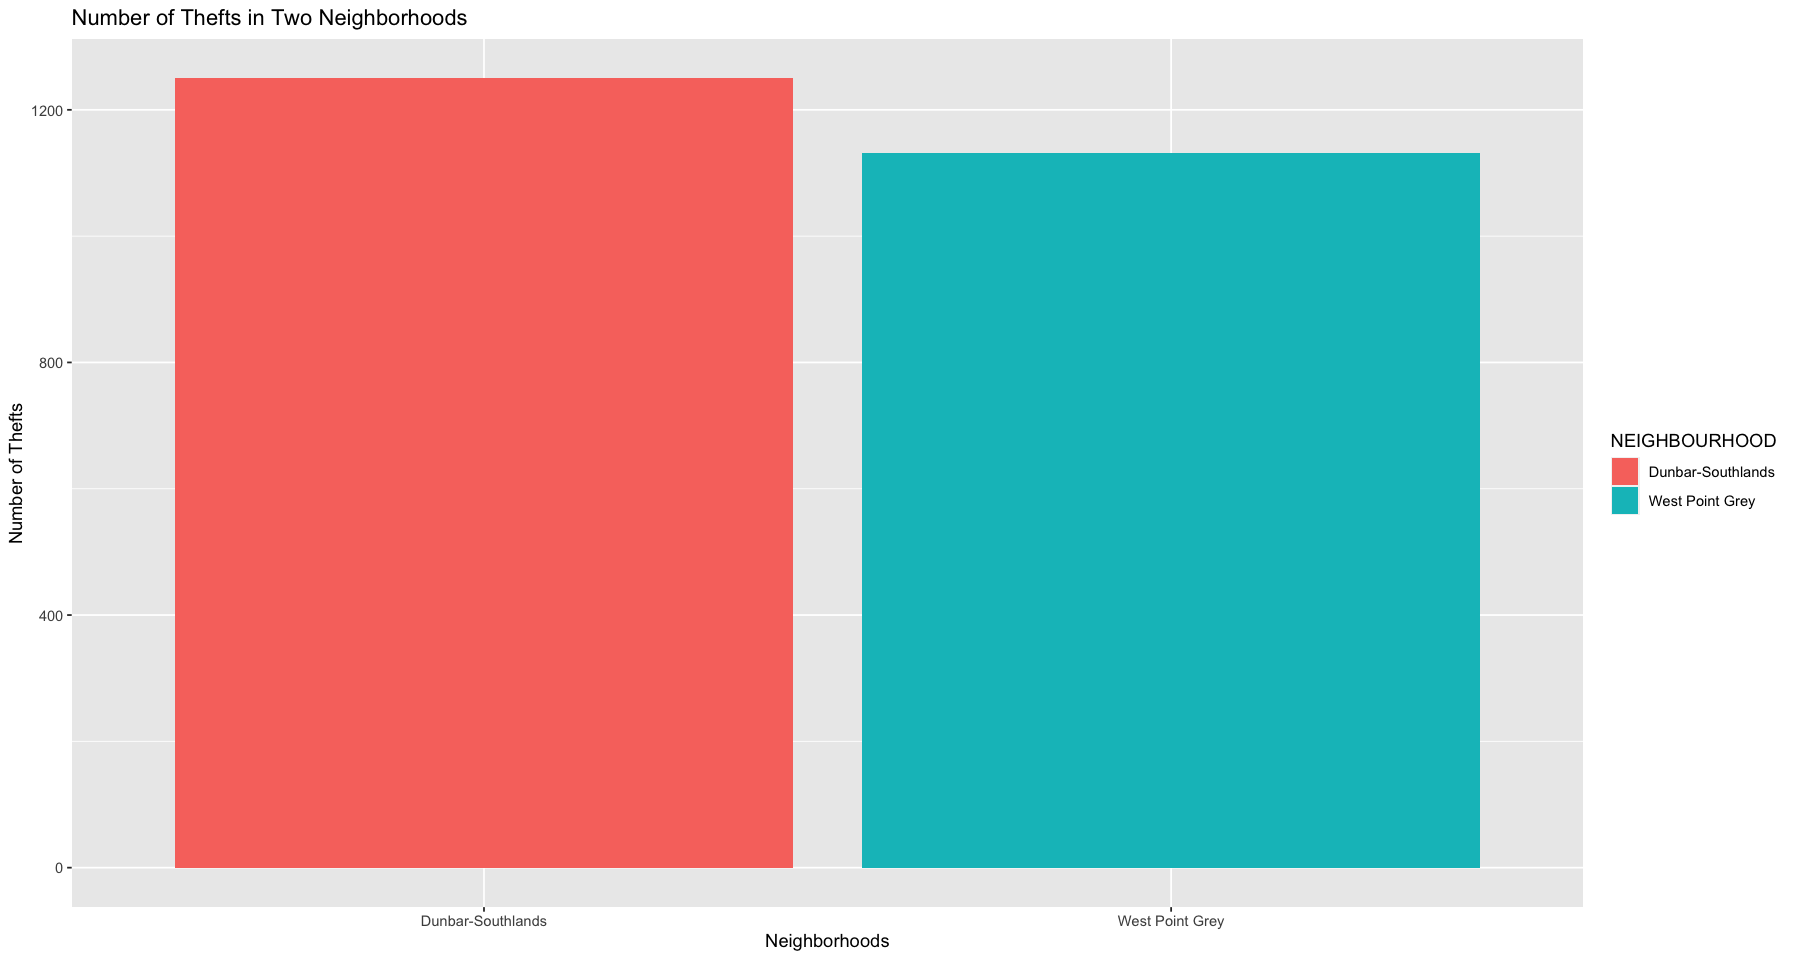

In [25]:
ggplot(summary, aes(x = NEIGHBOURHOOD, y = Theft, fill = NEIGHBOURHOOD)) +
  geom_bar(stat = "identity") +
  labs(title = "Number of Thefts in Two Neighborhoods",
       x = "Neighborhoods",
       y = "Number of Thefts") 

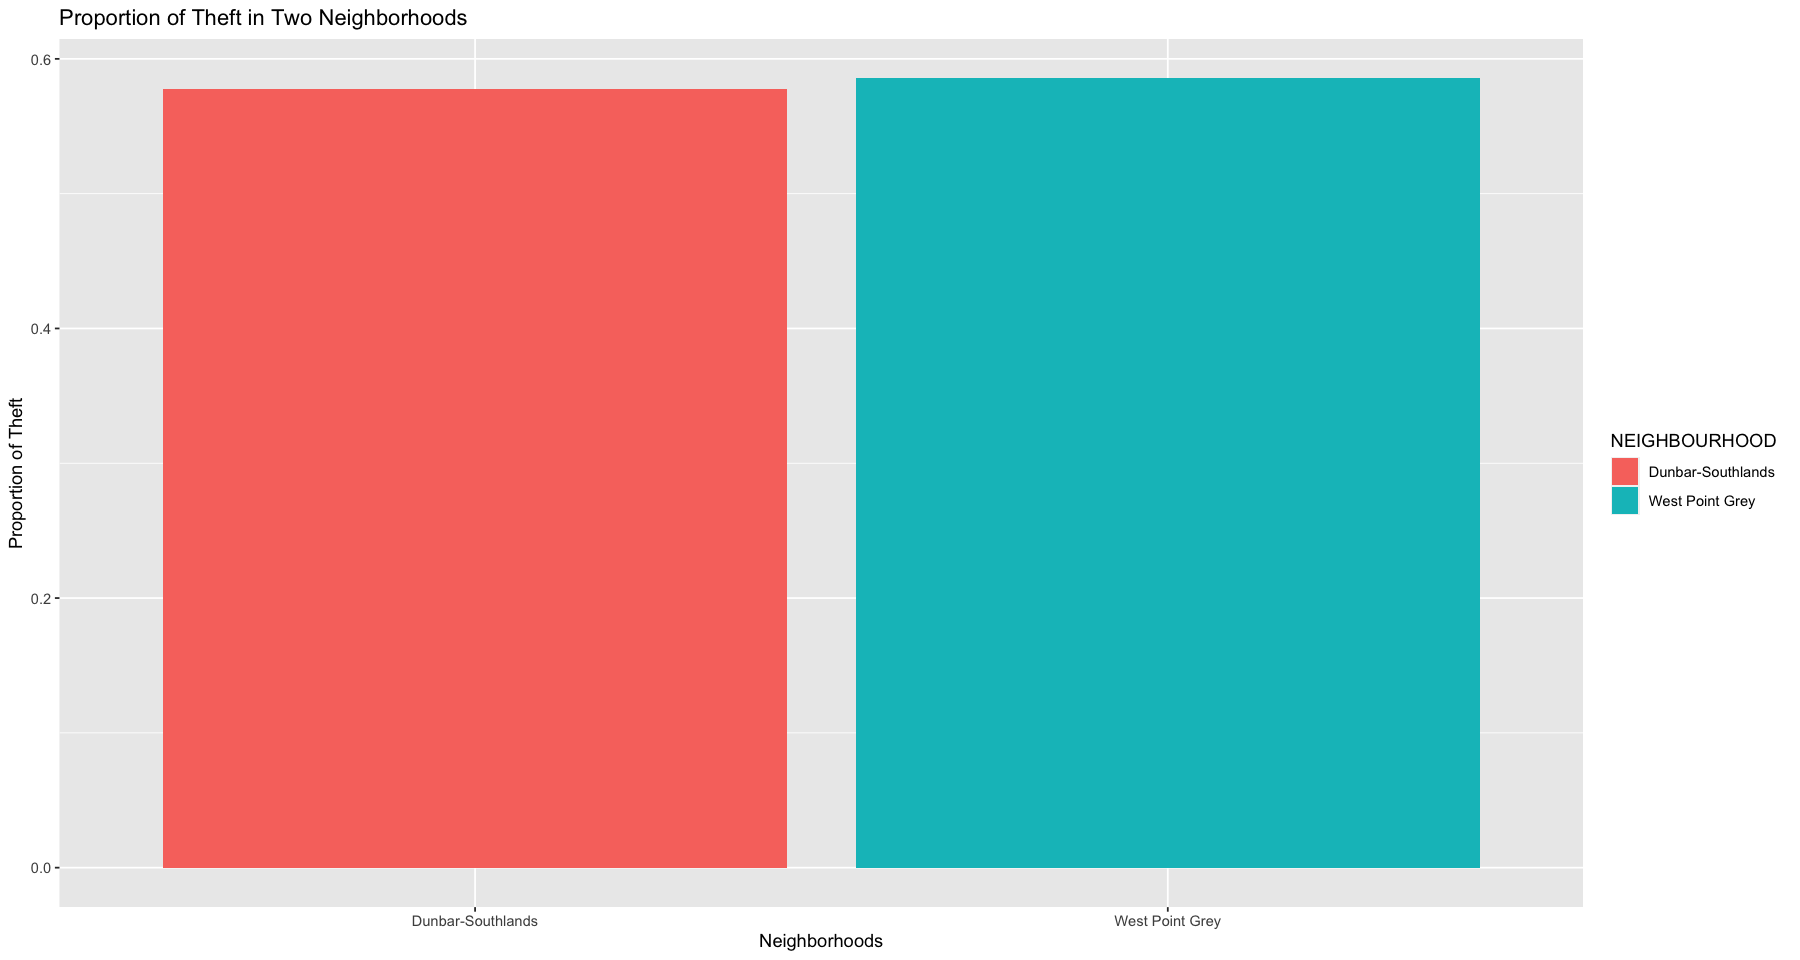

In [27]:
ggplot(summary, aes(x = NEIGHBOURHOOD, y = prop, fill = NEIGHBOURHOOD)) +
  geom_bar(stat = "identity") +
  labs(title = "Proportion of Theft in Two Neighborhoods",
       x = "Neighborhoods",
       y = "Proportion of Theft") 

# Methods: Plan
We will carry a two-sample z-test as we are comparing two proportions. From a random sampling, we will use bootstrapping, calculate the test statistic using 

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}. 
$$

to obtain our p-value and confidence interval. After showing that `prop.test` can be used to obtain the same result, we will decide whether we should reject our null hypothesis or not and conclude our study.

We expect that West Point Grey will have a higher proportion of bike theft compared to Dunbar Southlands, because it is closer to the UBC campus, meaning that there may be more bicycles here with the abundance of students who own bicycles and cycle to class everyday. 

Our findings could impact residents living in West Point Grey and Dunbar Southlands to be more wary of bicycle theft in their area. In fact, it can help individuals decide on which neighbourhood they would rather live in, should they want to be careful about bicycle theft near their living area. 

Should we find a statistical significance between the proportion of bicycle theft in both areas, it may raise further questions in determining the underlying motivations behind such thefts and what features cause an increase in bicycle theft in one area compared to another.


# References
- https://geodash.vpd.ca/opendata/
- https://vpd.ca/crime-statistics/
- https://www.justice.gc.ca/eng/cj-jp/state-etat/2019rpt-rap2019/p7.html
- https://laws-lois.justice.gc.ca/eng/acts/c-46/section-322.html
- https://vantagecollege.ubc.ca/blog/your-guide-neighborhoods-vancouver